The architecture is conv->pool->conv->pool->

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)
testloader= torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)
classes=('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [2]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        # 11 Layers : 8 conv layers and 3 fully connected layers !
        self.conv1 = nn.Conv2d(3, 8, 3,padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(8, 12, 3,padding=1)
        self.conv2_bn = nn.BatchNorm2d(12)
        self.conv3 = nn.Conv2d(12,20, 3,padding=1)
        self.conv3_bn = nn.BatchNorm2d(20)
        self.conv4 = nn.Conv2d(20,24, 3,padding=1)
        self.conv4_bn = nn.BatchNorm2d(24)
        self.conv5 = nn.Conv2d(24,32, 3,padding=1)
        self.conv5_bn = nn.BatchNorm2d(32)
        self.conv6 = nn.Conv2d(32,48, 3,padding=1)
        self.conv6_bn = nn.BatchNorm2d(48)
        self.conv7 = nn.Conv2d(48,64, 3,padding=1)
        self.conv7_bn = nn.BatchNorm2d(64)
        self.conv8 = nn.Conv2d(64,72, 3,padding=1)
        self.conv8_bn = nn.BatchNorm2d(72)
        self.conv9 = nn.Conv2d(72,80, 3,padding=1)
        self.conv9_bn = nn.BatchNorm2d(80)
        self.fc1 = nn.Linear(80*4*4, 120)
        self.fc1_bn = nn.BatchNorm2d(120)
        self.fc2 = nn.Linear(120, 84)
        self.fc2_bn = nn.BatchNorm2d(84)
        self.fc3 = nn.Linear(84, 10)

        
    def forward(self, x):
        x = F.sigmoid(self.conv1(x))
        x = F.sigmoid(self.conv2_bn((self.conv2(x))))
        x = self.pool(F.sigmoid(self.conv3_bn((self.conv3(x)))))
        x = F.sigmoid(self.conv4_bn((self.conv4(x))))
        x = F.sigmoid(self.conv5_bn((self.conv5(x))))
        x = self.pool(F.sigmoid(self.conv6_bn((self.conv6(x)))))
        x = F.sigmoid(self.conv7_bn((self.conv7(x))))
        x = F.sigmoid(self.conv8_bn((self.conv8(x))))
        x = self.pool(F.sigmoid(self.conv9_bn((self.conv9(x)))))

        x = x.view(-1, 80*4*4)
        x = F.sigmoid(self.fc1_bn(self.fc1(x)))
        x = F.sigmoid(self.fc2_bn(self.fc2(x)))
        x = self.fc3(x)
        return x

In [4]:
# Function to create an instance of the model on CUDA
def new_net(lrate,wd):

    net = Net().cuda()

    # net=Net()

    lossvsiter=[]

    # To see if the model is on CUDA or not !
    if (next(net.parameters()).is_cuda) :
        print("The model is on CUDA")
    else :
        print("The model is on CPU")

    # Import the optimizers 
    import torch.optim as optim

    # Declare a loss function
    criterion = nn.CrossEntropyLoss()

    # Declare an optimizer
    optimizer = optim.Adam(net.parameters(),lr=lrate,weight_decay=wd)

    #No of iterations !
    iterations = 25


    for epoch in range(iterations):  # loop over the dataset multiple times

        # Reset the loss for the current epoch !
        running_loss = 0.0

        # Loop over all the mini-batches therea are 12500 mini batches of size 4 each !
        for i, data in enumerate(trainloader, 0):
            # get the inputs
            inputs, labels = data

            # wrap them in Variable & if possible make them cuda tensors
            inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())

            # zero the parameter gradients for the current epoch
            optimizer.zero_grad()

            # forward + backward + optimize

            # forward
            outputs = net(inputs)
            loss = criterion(outputs, labels)

            # Calculate gradients of whatever variable set to req_gardients = True
            loss.backward()

            # Take one step of the gradient descent for this epoch ! 
            optimizer.step()

            # print statistics
            running_loss += loss.data[0]
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print('[Epoch :: %d, Mini Batch :: %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 2000))
                lossvsiter.append(running_loss / 2000)
                running_loss = 0.0


    print('Finished Training')
    return lossvsiter,net

In [5]:
lossvsiter_crazy_architecture_with_batch_norm,model_crazy_architecture_with_batch_norm=new_net(0.0005,1e-7)

The model is on CUDA
[Epoch :: 1, Mini Batch ::  2000] loss: 2.104
[Epoch :: 1, Mini Batch ::  4000] loss: 1.921
[Epoch :: 1, Mini Batch ::  6000] loss: 1.820
[Epoch :: 1, Mini Batch ::  8000] loss: 1.720
[Epoch :: 1, Mini Batch :: 10000] loss: 1.681
[Epoch :: 1, Mini Batch :: 12000] loss: 1.633
[Epoch :: 2, Mini Batch ::  2000] loss: 1.551
[Epoch :: 2, Mini Batch ::  4000] loss: 1.515
[Epoch :: 2, Mini Batch ::  6000] loss: 1.469
[Epoch :: 2, Mini Batch ::  8000] loss: 1.476
[Epoch :: 2, Mini Batch :: 10000] loss: 1.458
[Epoch :: 2, Mini Batch :: 12000] loss: 1.430
[Epoch :: 3, Mini Batch ::  2000] loss: 1.379
[Epoch :: 3, Mini Batch ::  4000] loss: 1.374
[Epoch :: 3, Mini Batch ::  6000] loss: 1.374
[Epoch :: 3, Mini Batch ::  8000] loss: 1.380
[Epoch :: 3, Mini Batch :: 10000] loss: 1.354
[Epoch :: 3, Mini Batch :: 12000] loss: 1.350
[Epoch :: 4, Mini Batch ::  2000] loss: 1.305
[Epoch :: 4, Mini Batch ::  4000] loss: 1.298
[Epoch :: 4, Mini Batch ::  6000] loss: 1.301
[Epoch :: 4, 

In [6]:
import pickle

with open("./results/lossvsiter_crazy_architecture_with_batch_norm_with_sigmoid.pkl","wb") as f:
    pickle.dump(lossvsiter_crazy_architecture_with_batch_norm,f)
    
with open("./results/model_crazy_architecture_with_batch_norm_with_sigmoid.pkl","wb") as f:
    pickle.dump(model_crazy_architecture_with_batch_norm,f)

In [7]:
def test_accuracy(model):
    correct = 0
    total = 0

    for data in testloader:
        images, labels = data
        images=images.cuda()
        labels=labels.cuda()
        try:
            outputs = model(Variable(images))
        except RuntimeError as re:
            print(outputs.is_cuda)
            print(str(re))
            sys.exit()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()
        accuracy_percentage= 100 * correct / total

    print('Accuracy of the network on the 10000 test images: %d' % (accuracy_percentage))
    print("The network predicted correct for %s"%(correct))
    return accuracy_percentage,correct

In [8]:
def train_accuracy(model):
    net = model
    total=0
    correct=0
    for i, data in enumerate(trainloader, 0):
        images, labels = data
        images=images.cuda()
        labels=labels.cuda()
        try:
            outputs = net(Variable(images))
        except RuntimeError as re:
            print(outputs.is_cuda)
            print(str(re))
            sys.exit()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()
        if (i%1000) == 0:
            print(i)

    print('Accuracy of the network on the 50000 trained images: %d %%' % (
        100 * correct / total))

In [9]:
test_accuracy(model_crazy_architecture_with_batch_norm)

Accuracy of the network on the 10000 test images: 71
The network predicted correct for 7100


(71.0, 7100)

In [10]:
train_accuracy(model_crazy_architecture_with_batch_norm)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
Accuracy of the network on the 50000 trained images: 76 %


In [11]:
net=model_crazy_architecture_with_batch_norm
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    images=images.cuda()
    labels=labels.cuda()
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 69 %
Accuracy of   car : 83 %
Accuracy of  bird : 58 %
Accuracy of   cat : 51 %
Accuracy of  deer : 70 %
Accuracy of   dog : 65 %
Accuracy of  frog : 72 %
Accuracy of horse : 73 %
Accuracy of  ship : 80 %
Accuracy of truck : 85 %


In [12]:
%matplotlib inline

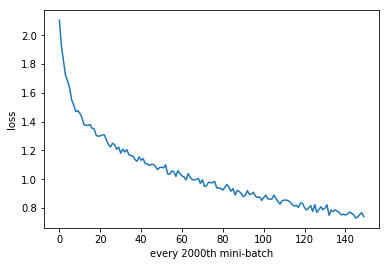

In [13]:
import matplotlib.pyplot as plt
plt.plot(lossvsiter_crazy_architecture_with_batch_norm)
plt.ylabel('loss')
plt.xlabel('every 2000th mini-batch')
plt.show()

In [20]:
# Lets save the model !!

In [14]:
torch.save(model_crazy_architecture_with_batch_norm.state_dict(),"./models/model_crazy_architecture_with_batch_norm_with_sigmoid_25_epochs")

In [15]:
# It seems the loss will further decrease with more iterations !

In [16]:
net=model_crazy_architecture_with_batch_norm
lossvsiter=lossvsiter_crazy_architecture_with_batch_norm
# To see if the model is on CUDA or not !
if (next(net.parameters()).is_cuda) :
    print("The model is on CUDA")
else :
    print("The model is on CPU")

# Import the optimizers 
import torch.optim as optim

# Declare a loss function
criterion = nn.CrossEntropyLoss()

# Declare an optimizer
optimizer = optim.Adam(net.parameters(),lr=0.0005,weight_decay=1e-7)

#No of iterations !
iterations = 25


for epoch in range(iterations):  # loop over the dataset multiple times

    # Reset the loss for the current epoch !
    running_loss = 0.0

    # Loop over all the mini-batches therea are 12500 mini batches of size 4 each !
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable & if possible make them cuda tensors
        inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())

        # zero the parameter gradients for the current epoch
        optimizer.zero_grad()

        # forward + backward + optimize

        # forward
        outputs = net(inputs)
        loss = criterion(outputs, labels)

        # Calculate gradients of whatever variable set to req_gardients = True
        loss.backward()

        # Take one step of the gradient descent for this epoch ! 
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[Epoch :: %d, Mini Batch :: %5d] loss: %.3f' %
                  (epoch + 1+25, i + 1, running_loss / 2000))
            lossvsiter.append(running_loss / 2000)
            running_loss = 0.0


print('Finished Training')

The model is on CUDA
[Epoch :: 26, Mini Batch ::  2000] loss: 0.742
[Epoch :: 26, Mini Batch ::  4000] loss: 0.749
[Epoch :: 26, Mini Batch ::  6000] loss: 0.723
[Epoch :: 26, Mini Batch ::  8000] loss: 0.746
[Epoch :: 26, Mini Batch :: 10000] loss: 0.741
[Epoch :: 26, Mini Batch :: 12000] loss: 0.752
[Epoch :: 27, Mini Batch ::  2000] loss: 0.701
[Epoch :: 27, Mini Batch ::  4000] loss: 0.733
[Epoch :: 27, Mini Batch ::  6000] loss: 0.748
[Epoch :: 27, Mini Batch ::  8000] loss: 0.707
[Epoch :: 27, Mini Batch :: 10000] loss: 0.696
[Epoch :: 27, Mini Batch :: 12000] loss: 0.753
[Epoch :: 28, Mini Batch ::  2000] loss: 0.706
[Epoch :: 28, Mini Batch ::  4000] loss: 0.730
[Epoch :: 28, Mini Batch ::  6000] loss: 0.697
[Epoch :: 28, Mini Batch ::  8000] loss: 0.712
[Epoch :: 28, Mini Batch :: 10000] loss: 0.718
[Epoch :: 28, Mini Batch :: 12000] loss: 0.714
[Epoch :: 29, Mini Batch ::  2000] loss: 0.707
[Epoch :: 29, Mini Batch ::  4000] loss: 0.683
[Epoch :: 29, Mini Batch ::  6000] loss

In [17]:
# Lets see the result ::

In [18]:
test_accuracy(model_crazy_architecture_with_batch_norm)

Accuracy of the network on the 10000 test images: 74
The network predicted correct for 7403


(74.03, 7403)

In [19]:
train_accuracy(model_crazy_architecture_with_batch_norm)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
Accuracy of the network on the 50000 trained images: 84 %


In [20]:
torch.save(model_crazy_architecture_with_batch_norm.state_dict(),"./models/model_crazy_architecture_with_batch_norm_with_sigmoid-50-epochs")

In [27]:
# Lets run it again for 25 more ... yay !!!!!!!

In [30]:
model_crazy_architecture_with_batch_norm.load_state_dict(torch.load("./models/model_crazy_architecture_with_batch_norm-50-epochs"))

In [31]:
model_crazy_architecture_with_batch_norm.eval()

Net (
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (conv2): Conv2d(8, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_bn): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True)
  (conv3): Conv2d(12, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3_bn): BatchNorm2d(20, eps=1e-05, momentum=0.1, affine=True)
  (conv4): Conv2d(20, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4_bn): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True)
  (conv5): Conv2d(24, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5_bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True)
  (conv6): Conv2d(32, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6_bn): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True)
  (conv7): Conv2d(48, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv7_bn): BatchNorm2d(64, eps=1e-05, momentum=0.

In [32]:
net=model_crazy_architecture_with_batch_norm
lossvsiter=lossvsiter_crazy_architecture_with_batch_norm
# To see if the model is on CUDA or not !
if (next(net.parameters()).is_cuda) :
    print("The model is on CUDA")
else :
    print("The model is on CPU")

# Import the optimizers 
import torch.optim as optim

# Declare a loss function
criterion = nn.CrossEntropyLoss()

# Declare an optimizer
optimizer = optim.Adam(net.parameters(),lr=0.0005,weight_decay=1e-7)

#No of iterations !
iterations = 25


for epoch in range(iterations):  # loop over the dataset multiple times

    # Reset the loss for the current epoch !
    running_loss = 0.0

    # Loop over all the mini-batches therea are 12500 mini batches of size 4 each !
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable & if possible make them cuda tensors
        inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())

        # zero the parameter gradients for the current epoch
        optimizer.zero_grad()

        # forward + backward + optimize

        # forward
        outputs = net(inputs)
        loss = criterion(outputs, labels)

        # Calculate gradients of whatever variable set to req_gardients = True
        loss.backward()

        # Take one step of the gradient descent for this epoch ! 
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[Epoch :: %d, Mini Batch :: %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            lossvsiter.append(running_loss / 2000)
            running_loss = 0.0


print('Finished Training')

The model is on CUDA
[Epoch :: 1, Mini Batch ::  2000] loss: 0.150
[Epoch :: 1, Mini Batch ::  4000] loss: 0.150
[Epoch :: 1, Mini Batch ::  6000] loss: 0.140
[Epoch :: 1, Mini Batch ::  8000] loss: 0.138
[Epoch :: 1, Mini Batch :: 10000] loss: 0.139
[Epoch :: 1, Mini Batch :: 12000] loss: 0.149
[Epoch :: 2, Mini Batch ::  2000] loss: 0.098
[Epoch :: 2, Mini Batch ::  4000] loss: 0.099
[Epoch :: 2, Mini Batch ::  6000] loss: 0.109
[Epoch :: 2, Mini Batch ::  8000] loss: 0.111
[Epoch :: 2, Mini Batch :: 10000] loss: 0.109
[Epoch :: 2, Mini Batch :: 12000] loss: 0.117
[Epoch :: 3, Mini Batch ::  2000] loss: 0.084
[Epoch :: 3, Mini Batch ::  4000] loss: 0.097
[Epoch :: 3, Mini Batch ::  6000] loss: 0.092
[Epoch :: 3, Mini Batch ::  8000] loss: 0.093
[Epoch :: 3, Mini Batch :: 10000] loss: 0.102
[Epoch :: 3, Mini Batch :: 12000] loss: 0.107
[Epoch :: 4, Mini Batch ::  2000] loss: 0.070
[Epoch :: 4, Mini Batch ::  4000] loss: 0.081
[Epoch :: 4, Mini Batch ::  6000] loss: 0.086
[Epoch :: 4, 

In [33]:
test_accuracy(model_crazy_architecture_with_batch_norm)

Accuracy of the network on the 10000 test images: 81
The network predicted correct for 8104


(81.04, 8104)

In [34]:
torch.save(model_crazy_architecture_with_batch_norm.state_dict(),"./models/model_crazy_architecture_with_batch_norm-75-epochs")

In [35]:
train_accuracy(model_crazy_architecture_with_batch_norm)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
Accuracy of the network on the 50000 trained images: 99 %


In [36]:
# Lets get in a century

In [37]:
net=model_crazy_architecture_with_batch_norm
lossvsiter=lossvsiter_crazy_architecture_with_batch_norm
# To see if the model is on CUDA or not !
if (next(net.parameters()).is_cuda) :
    print("The model is on CUDA")
else :
    print("The model is on CPU")

# Import the optimizers 
import torch.optim as optim

# Declare a loss function
criterion = nn.CrossEntropyLoss()

# Declare an optimizer
optimizer = optim.Adam(net.parameters(),lr=0.0005,weight_decay=1e-7)

#No of iterations !
iterations = 25


for epoch in range(iterations):  # loop over the dataset multiple times

    # Reset the loss for the current epoch !
    running_loss = 0.0

    # Loop over all the mini-batches therea are 12500 mini batches of size 4 each !
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable & if possible make them cuda tensors
        inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())

        # zero the parameter gradients for the current epoch
        optimizer.zero_grad()

        # forward + backward + optimize

        # forward
        outputs = net(inputs)
        loss = criterion(outputs, labels)

        # Calculate gradients of whatever variable set to req_gardients = True
        loss.backward()

        # Take one step of the gradient descent for this epoch ! 
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[Epoch :: %d, Mini Batch :: %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            lossvsiter.append(running_loss / 2000)
            running_loss = 0.0


print('Finished Training')

The model is on CUDA
[Epoch :: 1, Mini Batch ::  2000] loss: 0.047
[Epoch :: 1, Mini Batch ::  4000] loss: 0.037
[Epoch :: 1, Mini Batch ::  6000] loss: 0.044
[Epoch :: 1, Mini Batch ::  8000] loss: 0.040
[Epoch :: 1, Mini Batch :: 10000] loss: 0.046
[Epoch :: 1, Mini Batch :: 12000] loss: 0.039
[Epoch :: 2, Mini Batch ::  2000] loss: 0.041
[Epoch :: 2, Mini Batch ::  4000] loss: 0.040
[Epoch :: 2, Mini Batch ::  6000] loss: 0.042
[Epoch :: 2, Mini Batch ::  8000] loss: 0.041
[Epoch :: 2, Mini Batch :: 10000] loss: 0.037
[Epoch :: 2, Mini Batch :: 12000] loss: 0.044
[Epoch :: 3, Mini Batch ::  2000] loss: 0.034
[Epoch :: 3, Mini Batch ::  4000] loss: 0.036
[Epoch :: 3, Mini Batch ::  6000] loss: 0.037
[Epoch :: 3, Mini Batch ::  8000] loss: 0.047
[Epoch :: 3, Mini Batch :: 10000] loss: 0.035
[Epoch :: 3, Mini Batch :: 12000] loss: 0.038
[Epoch :: 4, Mini Batch ::  2000] loss: 0.035
[Epoch :: 4, Mini Batch ::  4000] loss: 0.043
[Epoch :: 4, Mini Batch ::  6000] loss: 0.037
[Epoch :: 4, 

In [38]:
test_accuracy(model_crazy_architecture_with_batch_norm)

Accuracy of the network on the 10000 test images: 79
The network predicted correct for 7982


(79.82, 7982)

In [39]:
train_accuracy(model_crazy_architecture_with_batch_norm)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
Accuracy of the network on the 50000 trained images: 98 %


In [40]:
torch.save(model_crazy_architecture_with_batch_norm.state_dict(),"./models/model_crazy_architecture_with_batch_norm-100-epochs")

In [41]:
model_crazy_architecture_with_batch_norm.load_state_dict(torch.load("./models/model_crazy_architecture_with_batch_norm-75-epochs"))

In [42]:
model_crazy_architecture_with_batch_norm.eval()

Net (
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (conv2): Conv2d(8, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_bn): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True)
  (conv3): Conv2d(12, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3_bn): BatchNorm2d(20, eps=1e-05, momentum=0.1, affine=True)
  (conv4): Conv2d(20, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4_bn): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True)
  (conv5): Conv2d(24, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5_bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True)
  (conv6): Conv2d(32, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6_bn): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True)
  (conv7): Conv2d(48, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv7_bn): BatchNorm2d(64, eps=1e-05, momentum=0.

In [43]:
test_accuracy(model_crazy_architecture_with_batch_norm)

Accuracy of the network on the 10000 test images: 81
The network predicted correct for 8104


(81.04, 8104)